In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/SI_670_Project/train_numerical.csv')
test_data = pd.read_csv('/content/drive/MyDrive/SI_670_Project/test_numerical.csv')

In [ ]:
X_train = train_data.drop(axis=1,columns=['Unnamed: 0'])
X_test = test_data.drop(axis=1,columns=['Unnamed: 0'])
# X_train = X_train[['words_less5_phonemes', 'perc_known_less_20', 'aoa_kup', 'aoa_kup_lem',
#        'perc_known', 'perc_known_lem', 'lexical_diversity', '3_syllable_count',
#        'noun_common', 'noun_common_plural', 'verb_past', 'pronoun_personal',
#        'flesch reading ease score', 'flesch kincaid grade level',
#        'coleman liau index', 'automated readability index',
#        'linsear write formula']]
# X_test = X_test[['words_less5_phonemes', 'perc_known_less_20', 'aoa_kup', 'aoa_kup_lem',
#        'perc_known', 'perc_known_lem', 'lexical_diversity', '3_syllable_count',
#        'noun_common', 'noun_common_plural', 'verb_past', 'pronoun_personal',
#        'flesch reading ease score', 'flesch kincaid grade level',
#        'coleman liau index', 'automated readability index',
#        'linsear write formula']]

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SI_670_Project/Data/readability_scores_included.csv')
y = np.array(data['label'])

In [ ]:
X = X_train
X['label'] = data['label']
X.corr()

,words_less5_phonemes,perc_known_less_20,aoa_kup,aoa_kup_lem,perc_known,perc_known_lem,lexical_diversity,3_syllable_count,noun_common,noun_common_plural,verb_past,pronoun_personal,flesch reading ease score,flesch kincaid grade level,coleman liau index,automated readability index,linsear write formula,label
words_less5_phonemes,1.000000,0.732913,0.024791,0.014544,0.197023,0.248669,0.870879,0.364933,0.538739,0.441057,0.390965,0.335857,-0.026748,0.412262,0.140279,0.407557,0.737093,0.193376
perc_known_less_20,0.732913,1.000000,-0.198171,0.089308,-0.191033,0.197952,0.698622,0.394953,0.302358,0.656345,0.353504,0.207770,-0.142139,0.422478,0.247486,0.429217,0.627547,0.175792
aoa_kup,0.024791,-0.198171,1.000000,0.732583,0.753786,0.404121,0.099374,0.176151,0.222890,-0.126252,-0.061108,-0.058622,-0.188382,0.197263,0.231040,0.133459,0.138186,0.093492
aoa_kup_lem,0.014544,0.089308,0.732583,1.000000,0.385445,0.589593,0.102666,0.230479,0.115327,0.104196,-0.028018,-0.083369,-0.300837,0.287200,0.362625,0.242726,0.163487,0.099955
perc_known,0.197023,-0.191033,0.753786,0.385445,1.000000,0.632310,0.194041,0.092211,0.254710,-0.143529,0.019587,0.069670,0.060537,0.044565,0.107663,-0.046136,0.172518,0.067593
perc_known_lem,0.248669,0.197952,0.404121,0.589593,0.632310,1.000000,0.230272,0.114053,0.139969,0.105214,0.100376,0.081330,0.052543,0.064747,0.213137,-0.018534,0.204103,0.047374
lexical_diversity,0.870879,0.698622,0.099374,0.102666,0.194041,0.230272,1.000000,0.533641,0.759142,0.463938,0.423125,0.229305,-0.172540,0.578081,0.271723,0.589708,0.884593,0.271350
3_syllable_count,0.364933,0.394953,0.176151,0.230479,0.092211,0.114053,0.533641,1.000000,0.431580,0.304777,0.167725,0.047163,-0.375615,0.540991,0.387538,0.516951,0.615391,0.203324
noun_common,0.538739,0.302358,0.222890,0.115327,0.254710,0.139969,0.759142,0.431580,1.000000,0.086765,0.258222,0.028051,-0.162193,0.471145,0.216392,0.501031,0.690506,0.228168
noun_common_plural,0.441057,0.656345,-0.126252,0.104196,-0.143529,0.105214,0.463938,0.304777,0.086765,1.000000,0.080449,0.028806,-0.159770,0.337631,0.234720,0.378964,0.443978,0.110411


In [ ]:
!pip install keras_metrics

In [ ]:
from keras import Sequential
from keras.models import Model
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers import Conv1D, MaxPooling1D
import keras
import keras_metrics

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Sequential()
model.add(Input(shape=(102,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',keras_metrics.precision(), keras_metrics.recall()])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               13184     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 13,313
Trainable params: 13,313
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_train = train_data.drop(axis=1,columns=['Unnamed: 0'])
X_test = test_data.drop(axis=1,columns=['Unnamed: 0'])
# X_train = X_train[['words_less5_phonemes', 'perc_known_less_20','lexical_diversity', '3_syllable_count','noun_common','noun_common_plural','flesch reading ease score' ,\
# 'flesch kincaid grade level','coleman liau index', 'automated readability index','linsear write formula']]
# X_test = X_test[['words_less5_phonemes', 'perc_known_less_20','lexical_diversity', '3_syllable_count','noun_common','noun_common_plural','flesch reading ease score', \
# 'flesch kincaid grade level','coleman liau index', 'automated readability index','linsear write formula']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.000001, random_state=0)

accuracy
Fitting 5 folds for each of 6 candidates, totalling 30 fits
9378/9378 [==============================] - 16s 2ms/step - loss: 0.6041 - accuracy: 0.6715 - val_loss: 0.5938 - val_accuracy: 0.6788
[CV 1/5] END batch_size=32, validation_split=0.1;, score=0.675 total time=  19.8s
9378/9378 [==============================] - 16s 2ms/step - loss: 0.6052 - accuracy: 0.6708 - val_loss: 0.5923 - val_accuracy: 0.6808
[CV 2/5] END batch_size=32, validation_split=0.1;, score=0.676 total time=  23.1s
9378/9378 [==============================] - 16s 2ms/step - loss: 0.6047 - accuracy: 0.6714 - val_loss: 0.5962 - val_accuracy: 0.6789
[CV 3/5] END batch_size=32, validation_split=0.1;, score=0.676 total time=  23.9s
9378/9378 [==============================] - 16s 2ms/step - loss: 0.6050 - accuracy: 0.6710 - val_loss: 0.5932 - val_accuracy: 0.6793
[CV 4/5] END batch_size=32, validation_split=0.1;, score=0.678 total time=  18.9s
9378/9378 [==============================] - 16s 2ms/step - loss: 0

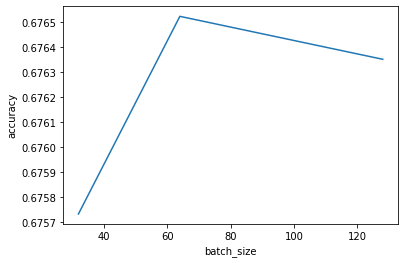

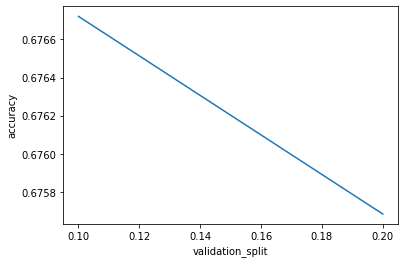

0.676 for {'batch_size': 32, 'validation_split': 0.1}
0.676 for {'batch_size': 32, 'validation_split': 0.2}
0.677 for {'batch_size': 64, 'validation_split': 0.1}
0.676 for {'batch_size': 64, 'validation_split': 0.2}
0.677 for {'batch_size': 128, 'validation_split': 0.1}
0.675 for {'batch_size': 128, 'validation_split': 0.2}

 For the model with the best accuracy


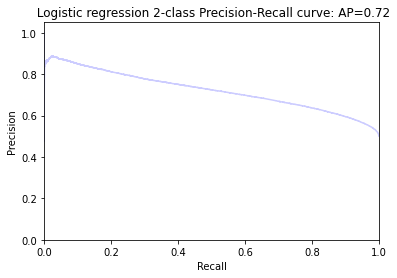

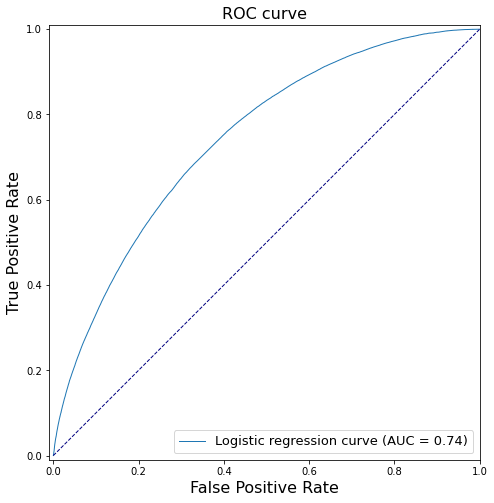

recall
Fitting 5 folds for each of 6 candidates, totalling 30 fits
9378/9378 [==============================] - 16s 2ms/step - loss: 0.6047 - accuracy: 0.6724 - val_loss: 0.5915 - val_accuracy: 0.6798
[CV 1/5] END batch_size=32, validation_split=0.1;, score=0.728 total time=  23.7s
9378/9378 [==============================] - 17s 2ms/step - loss: 0.6041 - accuracy: 0.6714 - val_loss: 0.5961 - val_accuracy: 0.6792
[CV 2/5] END batch_size=32, validation_split=0.1;, score=0.707 total time=  24.0s
9378/9378 [==============================] - 16s 2ms/step - loss: 0.6046 - accuracy: 0.6714 - val_loss: 0.6009 - val_accuracy: 0.6692
[CV 3/5] END batch_size=32, validation_split=0.1;, score=0.760 total time=  23.2s
9378/9378 [==============================] - 16s 2ms/step - loss: 0.6052 - accuracy: 0.6704 - val_loss: 0.5951 - val_accuracy: 0.6764
[CV 4/5] END batch_size=32, validation_split=0.1;, score=0.764 total time=  18.7s
9378/9378 [==============================] - 17s 2ms/step - loss: 0.6

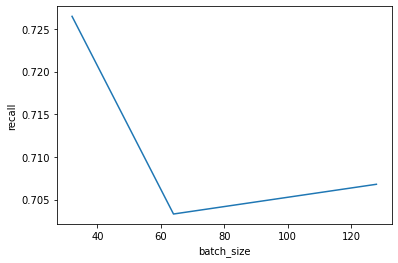

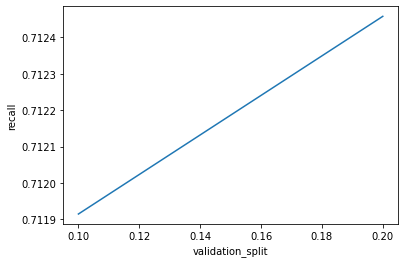

0.734 for {'batch_size': 32, 'validation_split': 0.1}
0.719 for {'batch_size': 32, 'validation_split': 0.2}
0.696 for {'batch_size': 64, 'validation_split': 0.1}
0.711 for {'batch_size': 64, 'validation_split': 0.2}
0.706 for {'batch_size': 128, 'validation_split': 0.1}
0.708 for {'batch_size': 128, 'validation_split': 0.2}

 For the model with the best recall


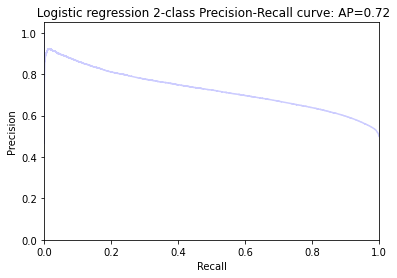

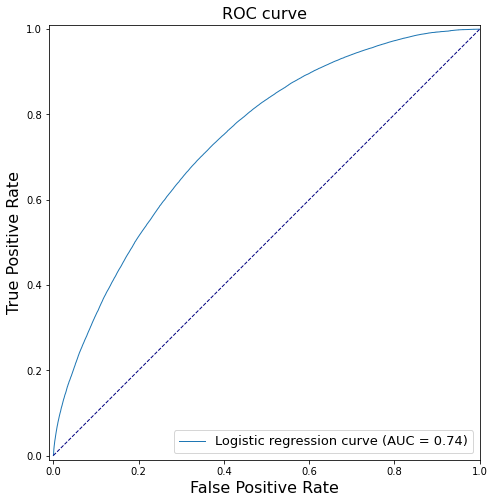

In [61]:
def create_model():
  model = Sequential()
  model.add(Input(shape=(102,)))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV



scores = ['accuracy','recall']
for score in scores:
  print(score)
  model = KerasClassifier(build_fn=create_model)
  epochs = np.array([50, 100, 150])
  batches = np.array([5, 10, 20])
  param_grid = {"batch_size":[32,64,128],"validation_split":[0.1,0.2]}
  grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=score,verbose=5)
  grid_result = grid.fit(X_train, y_train)
  print("Best parameters set found on training data:\n")
  print(grid.best_params_)
  means = grid.cv_results_['mean_test_score']
  print("Mean score: ",means)
  # Plot of score against each hyperparameter
  fig, ax = plt.subplots()
  vs_means = [np.mean(means[::2]),np.mean(means[1::2])]
  bs_means = [np.mean(means[:2]),np.mean(means[2:4]),np.mean(means[4:6])]
  a = ax.plot([32,64,128],bs_means)
  ax.set_xlabel('batch_size')
  ax.set_ylabel(score)
  plt.show()
  fig, ax = plt.subplots()
  a = ax.plot([0.1,0.2],vs_means)
  ax.set_xlabel('validation_split')
  ax.set_ylabel(score)
  plt.show()
  # For each of the two best models - Precision Recall Curve, AUC Curve
  for mean,params in zip(means,grid.cv_results_['params']):
      print("%0.3f for %r"% (mean, params))
  y_score = grid.best_estimator_.predict_proba(X_train)[:,-1]
  precision, recall, _ = precision_recall_curve(y_train, y_score)
  average_precision = average_precision_score(y_train, y_score)
  print("\n For the model with the best "+ score)
  plt.plot(recall, precision, color='b', alpha=0.2)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  fpr, tpr, _ = roc_curve(y_train, y_score)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(8,8))
  plt.xlim([-0.01, 1.00])
  plt.ylim([-0.01, 1.01])
  plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.title('ROC curve', fontsize=16)
  plt.legend(loc='lower right', fontsize=13)
  plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
  plt.axes().set_aspect('equal')
  plt.show()


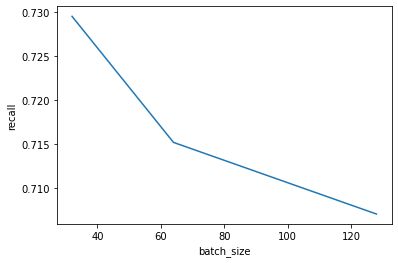

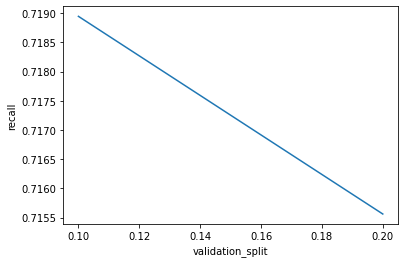

0.729 for {'batch_size': 32, 'validation_split': 0.1}
0.730 for {'batch_size': 32, 'validation_split': 0.2}
0.707 for {'batch_size': 64, 'validation_split': 0.1}
0.723 for {'batch_size': 64, 'validation_split': 0.2}
0.720 for {'batch_size': 128, 'validation_split': 0.1}
0.694 for {'batch_size': 128, 'validation_split': 0.2}

 For the model with the best recall


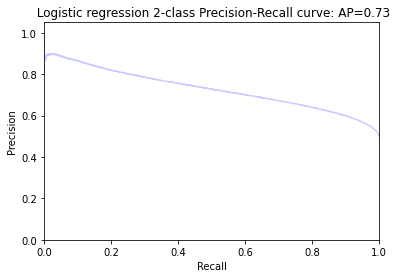

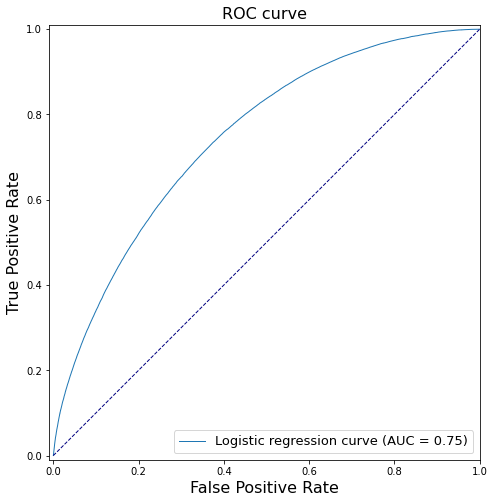

In [59]:
# # Plot of score against each hyperparameter
# fig, ax = plt.subplots()
# vs_means = [np.mean(means[::2]),np.mean(means[1::2])]
# bs_means = [np.mean(means[:2]),np.mean(means[2:4]),np.mean(means[4:6])]
# a = ax.plot([32,64,128],bs_means)
# ax.set_xlabel('batch_size')
# ax.set_ylabel(score)
# plt.show()
# fig, ax = plt.subplots()
# a = ax.plot([0.1,0.2],vs_means)
# ax.set_xlabel('validation_split')
# ax.set_ylabel(score)
# plt.show()
# # For each of the two best models - Precision Recall Curve, AUC Curve
# for mean,params in zip(means,grid.cv_results_['params']):
#     print("%0.3f for %r"% (mean, params))
# y_score = grid.best_estimator_.predict_proba(X_train)[:,-1]
# precision, recall, _ = precision_recall_curve(y_train, y_score)
# average_precision = average_precision_score(y_train, y_score)
# print("\n For the model with the best "+ score)
# plt.plot(recall, precision, color='b', alpha=0.2)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

# fpr, tpr, _ = roc_curve(y_train, y_score)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8,8))
# plt.xlim([-0.01, 1.00])
# plt.ylim([-0.01, 1.01])
# plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
# plt.xlabel('False Positive Rate', fontsize=16)
# plt.ylabel('True Positive Rate', fontsize=16)
# plt.title('ROC curve', fontsize=16)
# plt.legend(loc='lower right', fontsize=13)
# plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
# plt.axes().set_aspect('equal')
# plt.show()